<a href="https://colab.research.google.com/github/juanscho09/dma-ros-colab/blob/main/Reconocimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from IPython import display
import numpy as np
import time
import matplotlib.pyplot as plt

class perceptron_plot:
    def __init__(self, X, Y, delay) -> None:
        self.X = X
        self.Y = Y
        self.delay = delay
        x1_min = np.min(X[:,0])
        x2_min = np.min(X[:,1])
        x1_max = np.max(X[:,0])
        x2_max = np.max(X[:,1])
        self.x1_min = x1_min - 0.75*(x1_max - x1_min)
        self.x1_max = x1_max + 0.75*(x1_max - x1_min)
        self.x2_min = x2_min - 0.75*(x2_max - x2_min)
        self.x2_max = x2_max + 0.75*(x2_max - x2_min)
        self.fig = plt.figure(figsize = (10,8))
        self.ax = self.fig.subplots()
        self.ax.set_xlim(self.x1_min, self.x1_max, auto=False)
        self.ax.set_ylim(self.x2_min, self.x2_max, auto=False)

    def graficar(self, W, x0, epoch, fila) -> None:
        display.clear_output(wait =True)
        plt.cla()
        #self.ax = self.fig.subplots()

        self.ax.set_xlim(self.x1_min, self.x1_max)
        self.ax.set_ylim(self.x2_min, self.x2_max)
        plt.title( 'epoch ' + str(epoch) )
        # ploteo puntos positivos
        self.ax.plot(self.X[self.Y==1,0], self.X[self.Y==1,1], 'o', color="green", markersize=10)
        # ploteo puntos negativos
        self.ax.plot(self.X[self.Y==0,0], self.X[self.Y==0,1], 'o', color="blue", markersize=10)

        # Sobreploteo el punto que no coincidio
        if(fila>=0):
            self.ax.plot(self.X[fila,0], self.X[fila,1], 'o',
                         color= ('green' if self.Y[fila]==1 else 'blue'),
                         markersize= 12, markeredgecolor= 'red')

        #dibujo le recta
        vx2_min = -(W[0]*self.x1_min + x0)/W[1]
        vx2_max = -(W[0]*self.x1_max + x0)/W[1]

        self.ax.plot([self.x1_min, self.x1_max],
                     [vx2_min, vx2_max],
                     linewidth = 2,
                     color = 'red',
                     alpha = 0.5)

        display.display(plt.gcf())
        #plt.cla()
        time.sleep(self.delay)


    def graficarVarias(self, W, x0, epoch, fila) -> None:
        display.clear_output(wait =True)
        plt.cla()
        #self.ax = self.fig.subplots()

        self.ax.set_xlim(self.x1_min, self.x1_max)
        self.ax.set_ylim(self.x2_min, self.x2_max)
        plt.title( 'epoch ' + str(epoch) )
        # ploteo puntos positivos
        self.ax.plot(self.X[self.Y==1,0], self.X[self.Y==1,1], 'o', color="green", markersize=10)
        # ploteo puntos negativos
        self.ax.plot(self.X[self.Y==-1,0], self.X[self.Y==-1,1], 'o', color="blue", markersize=10)
        self.ax.plot(self.X[self.Y==0,0], self.X[self.Y==0,1], 'o', color="blue", markersize=10)

        # Sobreploteo el punto que no coincidio
        if(fila>=0):
            self.ax.plot(self.X[fila,0], self.X[fila,1], 'o',
                         color= ('green' if self.Y[fila]==1 else 'blue'),
                         markersize= 12, markeredgecolor= 'red')

        # dibujo las rectas
        for i in range(len(x0)):
            #vx2_min = -(W[0,i]*self.x1_min + x0[i])/W[1,i]
            #vx2_max = -(W[0,i]*self.x1_max + x0[i])/W[1,i]
            vx2_min = -(W[i,0]*self.x1_min + x0[i])/W[i,1]
            vx2_max = -(W[i,0]*self.x1_max + x0[i])/W[i,1]

            self.ax.plot([self.x1_min, self.x1_max],
                         [vx2_min, vx2_max],
                         linewidth = 2,
                         color = 'red',
                         alpha = 0.5)

        display.display(plt.gcf())
        #plt.cla()
        time.sleep(self.delay)


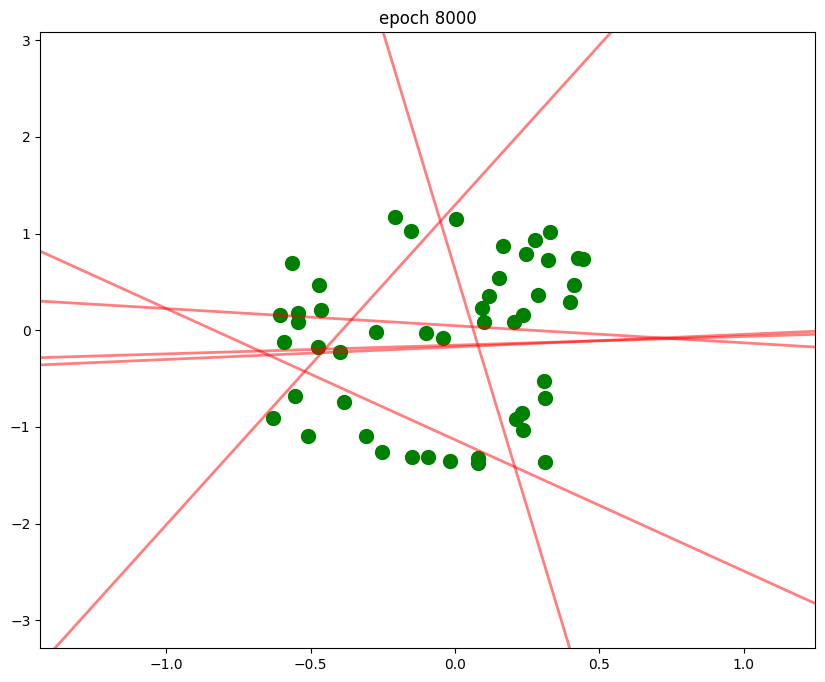

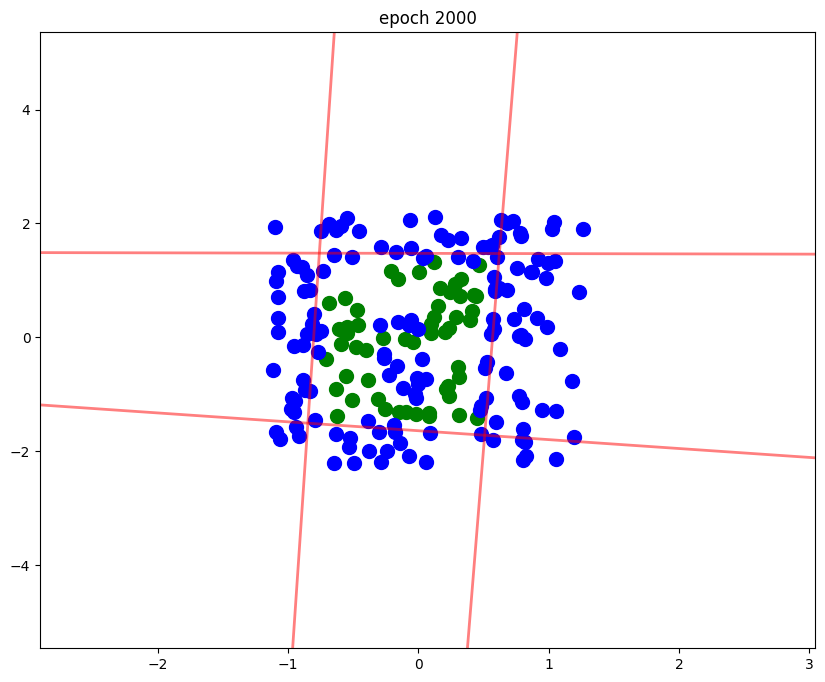

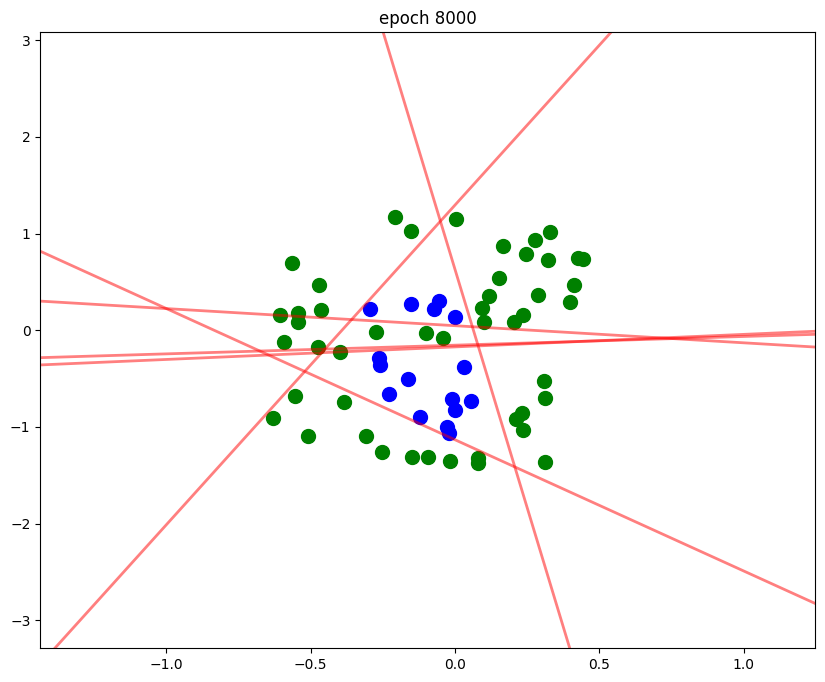

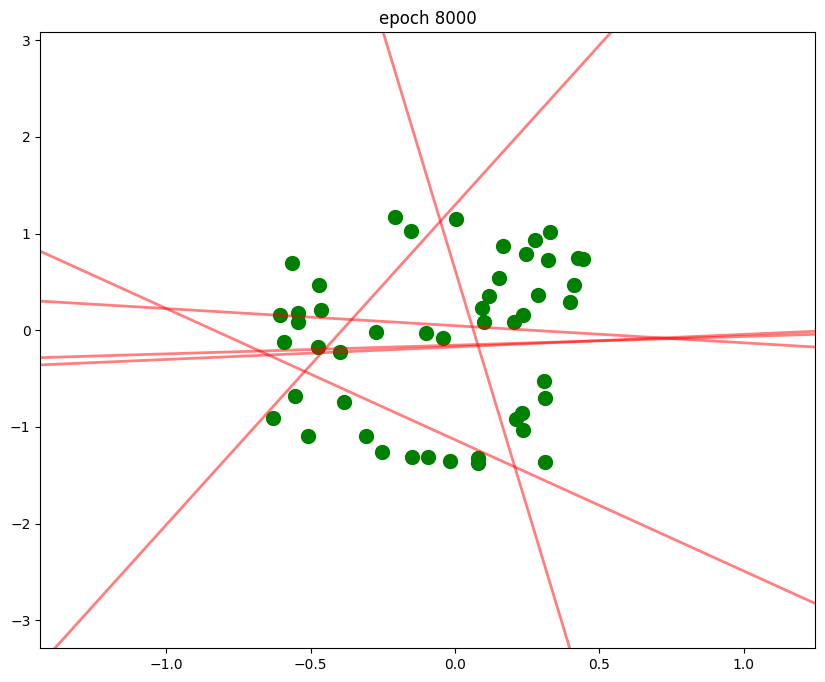

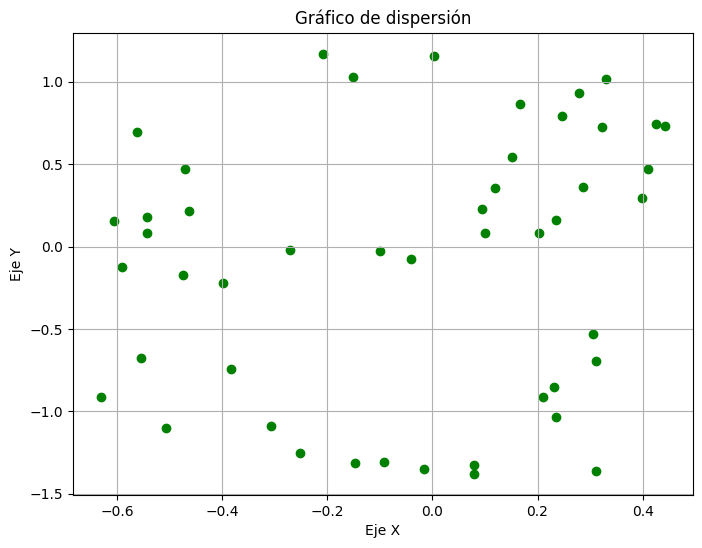

In [ ]:
# backpropagation, just one hidden layer
# lo hago con  matrices de pesos
# puedo tener tantos inputs como quiera
# puedo tener tantas neuronas ocultas como quiera
# puedo tener tanas neuronas de salida como quiera
# fuera de este codigo esta la decision que tomo segun el valor de salida de cada neurona de salida

import math
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import standardize
import pandas as pd

from graficos import perceptron_plot

def func_eval(fname, x):
    match fname:
        case "purelin":
            y = x
        case "logsig":
            y = 1.0 / ( 1.0 + math.exp(-x) )
        case "tansig":
            y = 2.0 / ( 1.0 + math.exp(-2.0*x) ) - 1.0
    return y

func_eval_vec = np.vectorize(func_eval)

def deriv_eval(fname, y):  #atencion que y es la entrada y=f( x )
    match fname:
        case "purelin":
            d = 1.0
        case "logsig":
            d = y*(1.0-y)
        case "tansig":
            d = 1.0 - y*y
    return d

deriv_eval_vec = np.vectorize(deriv_eval)


print("Leyendo archivo")
df = pd.read_csv("./datasets/ocho.txt", sep="\t")

# Ejemplo a resolver  el simplisimo  AND
# Crea el array entrada
entrada = df[['x1', 'x2']].values.tolist()
entrada = (entrada - np.mean(entrada, axis=0)) / np.std(entrada)


# Crea el array salida
salida = df['y'].values.tolist()

# Paso las listas a numpy
X = np.array(entrada)
Y = np.array(salida).reshape(len(X),1)

filas_qty = len(X)
input_size = X.shape[1]   # 2 entradas
hidden_size = 4  # neuronas capa oculta
output_size = Y.shape[1]  # 1 neurona

# defino las funciones de activacion de cada capa
hidden_FUNC = 'logsig'  # uso la logistica
output_FUNC = 'logsig'  # uso la tangente hiperbolica

# incializo los graficos
grafico = perceptron_plot(X, np.array(salida), 0.001)


# Incializo las matrices de pesos azarosamente
# W1 son los pesos que van del input a la capa oculta
# W2 son los pesos que van de la capa oculta a la capa de salida
np.random.seed(1021) #mi querida random seed para que las corridas sean reproducibles
W1 = np.random.uniform(-0.5, 0.5, [hidden_size, input_size])
X01 = np.random.uniform(-0.5, 0.5, [hidden_size, 1] )
W2 = np.random.uniform(-0.5, 0.5, [output_size, hidden_size])
X02 = np.random.uniform(-0.5, 0.5, [output_size, 1] )

# Avanzo la red, forward
# para TODOS los X al mismo tiempo !
#  @ hace el producto de una matrix por un vector_columna
hidden_estimulos = W1 @ X.T + X01
hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
output_estimulos = W2 @ hidden_salidas + X02
output_salidas = func_eval_vec(output_FUNC, output_estimulos)

# calculo el error promedi general de TODOS los X
Error= np.mean( (Y.T - output_salidas)**2 )

# Inicializo
epoch_limit = 2000    # para terminar si no converge
Error_umbral = 1.0e-06
learning_rate = 0.5
Error_last = 10    # lo debo poner algo dist a 0 la primera vez
epoch = 0

while ( math.fabs(Error_last-Error)>Error_umbral and (epoch < epoch_limit)):
    epoch += 1
    Error_last = Error

    # recorro siempre TODA la entrada
    for fila in range(filas_qty): #para cada input x_sub_fila del vector X
        # propagar el x hacia adelante
        hidden_estimulos = W1 @ X[fila:fila+1, :].T + X01
        hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
        output_estimulos = W2 @ hidden_salidas + X02
        output_salidas = func_eval_vec(output_FUNC, output_estimulos)

        # calculo los errores en la capa hidden y la capa output
        ErrorSalida = Y[fila:fila+1,:].T - output_salidas
        # output_delta es un solo numero
        output_delta = ErrorSalida * deriv_eval_vec(output_FUNC, output_salidas)
        # hidden_delta es un vector columna
        hidden_delta = deriv_eval_vec(hidden_FUNC, hidden_salidas)*(W2.T @ output_delta)

        # ya tengo los errores que comete cada capa
        # corregir matrices de pesos, voy hacia atras
        # backpropagation
        W1 = W1 + learning_rate * (hidden_delta @ X[fila:fila+1, :] )
        X01 = X01 + learning_rate * hidden_delta
        W2 = W2 + learning_rate * (output_delta @ hidden_salidas.T)
        X02 = X02 + learning_rate * output_delta

    # ya recalcule las matrices de pesos
    # ahora avanzo la red, feed-forward
    hidden_estimulos = W1 @ X.T + X01
    hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
    output_estimulos = W2 @ hidden_salidas + X02
    output_salidas = func_eval_vec(output_FUNC, output_estimulos)

    # calculo el error promedio general de TODOS los X
    Error= np.mean( (Y.T - output_salidas)**2 )
        # Visualización de resultados, si es necesario
    if epoch % 200 == 0:
        grafico.graficarVarias(W1, X01.T[0], epoch, -1)
        print(f"Epoch {epoch}: Error = {Error}")


    # tengo que hacer X01.T[0]  para que pase el vector
    # grafico.graficarVarias(W1, X01.T[0], epoch, -1)
    # print(hidden_estimulos, hidden_salidas, output_estimulos, output_salidas)
grafico.graficarVarias(W1, X01.T[0], epoch, -1)


# Obtener las salidas del primer modelo
hidden_estimulos_primer_modelo = W1 @ X.T + X01
hidden_salidas_primer_modelo = func_eval_vec(hidden_FUNC, hidden_estimulos_primer_modelo)
output_estimulos_primer_modelo = W2 @ hidden_salidas_primer_modelo + X02
output_salidas_primer_modelo = func_eval_vec(output_FUNC, output_estimulos_primer_modelo)

# Agregar las salidas del primer modelo como características adicionales
X_con_salidas_primer_modelo =X
# np.concatenate((X, output_salidas_primer_modelo.T), axis=1)
Error= 0 #np.mean( (Y.T - output_salidas_primer_modelo)**2 )

#elimina los negativos
indices_eliminar = np.where(np.array(output_salidas_primer_modelo[0]) < 0.75)[0]
X_con_salidas_primer_modelo = np.delete(X_con_salidas_primer_modelo, indices_eliminar, axis=0)
Y = np.delete(Y, indices_eliminar, axis=0)


# Parámetros para el segundo modelo
input_size_second_model = X_con_salidas_primer_modelo.shape[1]
hidden_size_second_model = 6
output_size_second_model = 1

grafico2 = perceptron_plot(X_con_salidas_primer_modelo,np.delete(salida, indices_eliminar, axis=0) , 0.001)


# Inicialización de pesos del segundo modelo
np.random.seed(789)
W1_second_model = np.random.uniform(-0.5, 0.5, [hidden_size_second_model, input_size_second_model])
X01_second_model = np.random.uniform(-0.5, 0.5, [hidden_size_second_model, 1])
W2_second_model = np.random.uniform(-0.5, 0.5, [output_size_second_model, hidden_size_second_model])
X02_second_model = np.random.uniform(-0.5, 0.5, [output_size_second_model, 1])


# Entrenamiento del segundo modelo
epoch_limit_second_model = 8000
Error_umbral_second_model = 1.0e-8
learning_rate_second_model = 0.25
Error_last_second_model = 10
epoch_second_model = 0
Error_second_model = 0

while (math.fabs(Error_last_second_model - Error_second_model) > Error_umbral_second_model and epoch_second_model < epoch_limit_second_model):
    epoch_second_model += 1
    Error_last_second_model = Error_second_model

    for fila in range(len(X_con_salidas_primer_modelo)):
        hidden_estimulos_second_model = W1_second_model @ X_con_salidas_primer_modelo[fila:fila+1, :].T + X01_second_model
        hidden_salidas_second_model = func_eval_vec(hidden_FUNC, hidden_estimulos_second_model)
        output_estimulos_second_model = W2_second_model @ hidden_salidas_second_model + X02_second_model
        output_salidas_second_model = func_eval_vec(output_FUNC, output_estimulos_second_model)

        ErrorSalida_second_model = Y[fila:fila+1, :].T - output_salidas_second_model
        output_delta_second_model = ErrorSalida_second_model * deriv_eval_vec(output_FUNC, output_salidas_second_model)
        hidden_delta_second_model = deriv_eval_vec(hidden_FUNC, hidden_salidas_second_model) * (W2_second_model.T @ output_delta_second_model)

        W1_second_model = W1_second_model + learning_rate_second_model * (hidden_delta_second_model @ X_con_salidas_primer_modelo[fila:fila+1, :])
        X01_second_model = X01_second_model + learning_rate_second_model * hidden_delta_second_model
        W2_second_model = W2_second_model + learning_rate_second_model * (output_delta_second_model @ hidden_salidas_second_model.T)
        X02_second_model = X02_second_model + learning_rate_second_model * output_delta_second_model

    hidden_estimulos_second_model = W1_second_model @ X_con_salidas_primer_modelo.T + X01_second_model
    hidden_salidas_second_model = func_eval_vec(hidden_FUNC, hidden_estimulos_second_model)
    output_estimulos_second_model = W2_second_model @ hidden_salidas_second_model + X02_second_model
    output_salidas_second_model = func_eval_vec(output_FUNC, output_estimulos_second_model)

    Error_second_model = np.mean((Y.T - output_salidas_second_model) ** 2)

    # tengo que hacer X01.T[0]  para que pase el vector
    # grafico.graficarVarias(W1_2, X01_2.T[0], epoch_2, -1)
    # print(hidden_estimulos, hidden_salidas, output_estimulos, output_salidas)

    # Visualización de resultados, si es necesario
    if epoch_second_model % 100 == 0:
        print(f"Epoch {epoch_second_model}: Error = {Error_second_model}")
        grafico2.graficarVarias(W1_second_model, X01_second_model.T[0], epoch_second_model, -1)

# El segundo modelo ha sido entrenado utilizando las salidas del primer modelo como características adicionales

grafico2.graficarVarias(W1_second_model, X01_second_model.T[0], epoch_second_model, -1)



indices_eliminar_1 = np.where(np.array(output_salidas_primer_modelo[0]) < 0.75)[0]
indices_eliminar_2 = np.where(np.array(output_salidas_second_model[0]) < 0.75)[0]
salida_aux = np.delete(salida, indices_eliminar_1, axis=0)
salida_2 = np.delete(salida_aux, indices_eliminar_2, axis=0)
X_segundo_modelo = np.delete(X_con_salidas_primer_modelo, indices_eliminar_2, axis=0)

grafico3 = perceptron_plot(X_segundo_modelo,salida_2 , 0.001)
grafico3.graficarVarias(W1_second_model, X01_second_model.T[0], epoch_second_model, -1)
x = X_segundo_modelo[:, 0]
y = X_segundo_modelo[:, 1]

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='green', marker='o')
plt.title('Gráfico de dispersión')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.grid(True)
plt.show()